In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
import os
import warnings; warnings.simplefilter('ignore')


>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$ M_{*} = \epsilon M_{1} \left( \frac{M_{peak}}{M_1} \right)^{\alpha}$

$ M_{*} = \left( \epsilon M_{1}^{1-\alpha} \right) \left( M_{peak} \right)^{\alpha} $

$\log_{10} (M_{*}) = \alpha \log_{10} (M_{peak}) + \log_{10}\left( \epsilon M_{1}^{1-\alpha} \right)$

$y = mx + b$, where $a$ is the slope, and $b$ the intercept, is a function of the slope and the normalization 



------------------------------




$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$ for the increasing scatter!

In [2]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

In [3]:
halo_masses = np.log10(np.logspace(8, 13, 100)) # just for the model

stellar_masses = galhalo.lgMs_D22_det(halo_masses) 

stellar_masses_15 = galhalo.lgMs_D22_dex(halo_masses, 0.01) 

stellar_masses_5 = galhalo.lgMs_D22_dex(halo_masses, 0.15) 

stellar_masses_2 = galhalo.lgMs_D22_dex(halo_masses, 0.30) 

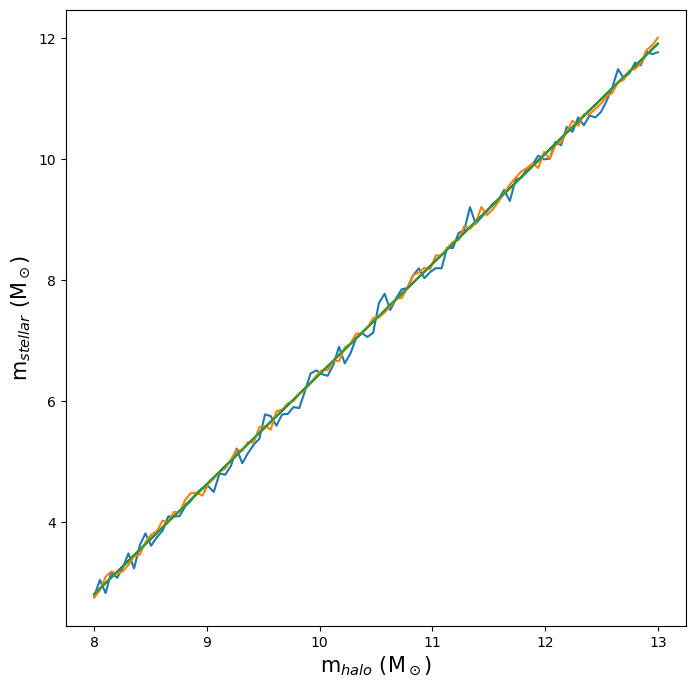

In [4]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses, color="black", label="deterministic")

plt.plot(halo_masses, stellar_masses_2, label="0.3 dex scatter")
plt.plot(halo_masses, stellar_masses_5, label="0.15 dex scatter")
plt.plot(halo_masses, stellar_masses_15, label="0.01 dex scatter")


plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
#plt.legend()
#plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [5]:
stellar_masses_RP = galhalo.lgMs_RP17(halo_masses, 0)
stellar_masses_B = galhalo.lgMs_B13(halo_masses,0)

stellar_masses_RP_1 = galhalo.lgMs_RP17(halo_masses, 0.5)
stellar_masses_B_1 = galhalo.lgMs_B13(halo_masses,0.5)

stellar_masses_RP_2 = galhalo.lgMs_RP17(halo_masses, 1)
stellar_masses_B_2 = galhalo.lgMs_B13(halo_masses,1)

stellar_masses_RP_3 = galhalo.lgMs_RP17(halo_masses, 1.5)
stellar_masses_B_3 = galhalo.lgMs_B13(halo_masses,1.5)

stellar_masses_RP_4 = galhalo.lgMs_RP17(halo_masses, 2)
stellar_masses_B_4 = galhalo.lgMs_B13(halo_masses,2)

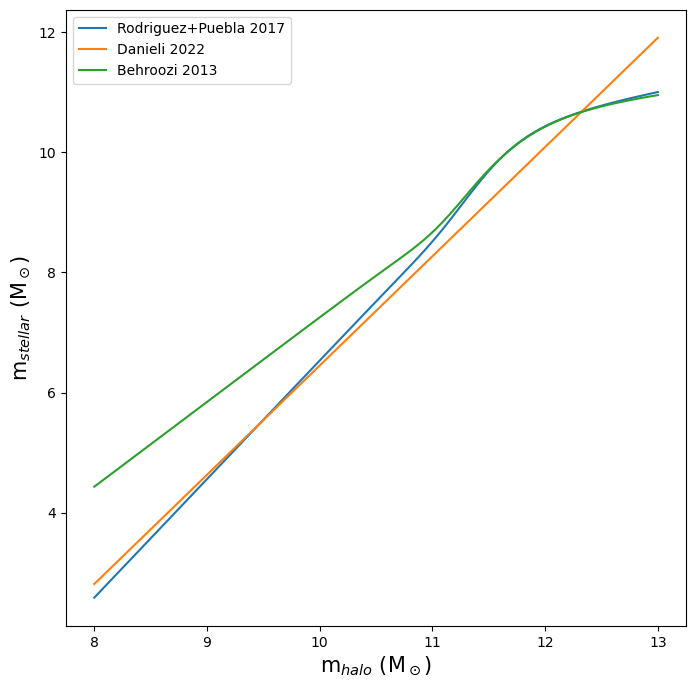

In [6]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017")
plt.plot(halo_masses, stellar_masses, label="Danieli 2022")
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

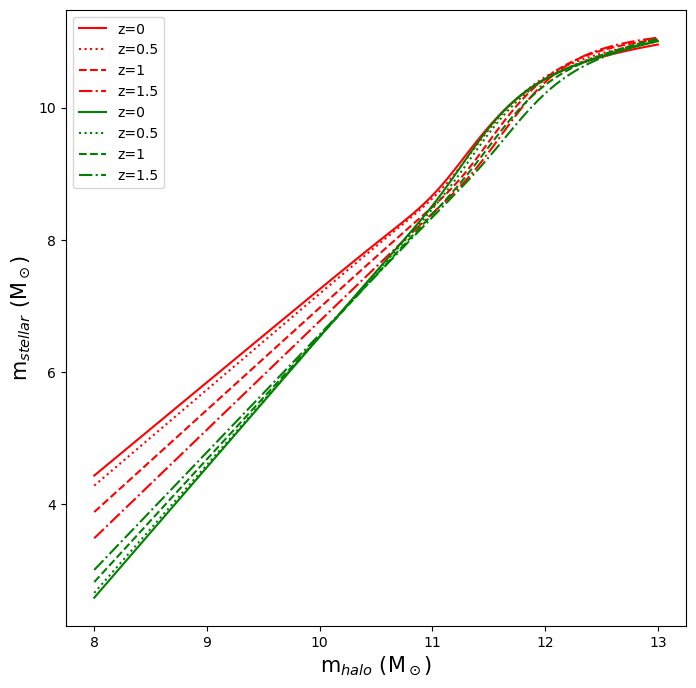

In [7]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_B, label="z=0", color="red")
plt.plot(halo_masses, stellar_masses_B_1, label="z=0.5", color="red", ls=":")
plt.plot(halo_masses, stellar_masses_B_2, label="z=1", color="red", ls="--")
plt.plot(halo_masses, stellar_masses_B_3, label="z=1.5", color="red", ls="-.")

plt.plot(halo_masses, stellar_masses_RP, label="z=0", color="green")
plt.plot(halo_masses, stellar_masses_RP_1, label="z=0.5", color="green", ls=":")
plt.plot(halo_masses, stellar_masses_RP_2, label="z=1", color="green", ls="--")
plt.plot(halo_masses, stellar_masses_RP_3, label="z=1.5", color="green", ls="-.")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

In [8]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

zero_mask = as_data != 0.0 #masking the padding!
Mh = np.log10(np.where(zero_mask, as_data, np.nan)) #switching the to nans!

halo_mass = Mh[0]
red = as_red[0]

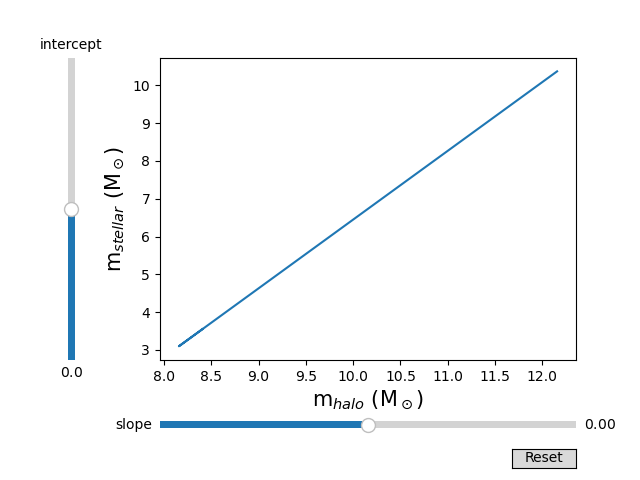

In [14]:
from matplotlib.widgets import Slider, Button
%matplotlib widget


# The parametrized function to be plotted

def SHMR_params(lgMv, red, gamma_s, gamma_i):

    red_dep = 1+np.nanmean(red)
    a = 1.82*red_dep**gamma_s
    log_e = -1.5*red_dep**gamma_i
    lgMs = log_e + 12.5 + a*lgMv - a*12.5

    return lgMs

# Define initial parameters
init_gamma_s = 0
init_gamma_i = 0

# Create the figure and the line that we will manipulate

fig, ax = plt.subplots()
line, = ax.plot(halo_mass, SHMR_params(halo_mass, red, init_gamma_s, init_gamma_i))
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axslope = fig.add_axes([0.25, 0.1, 0.65, 0.03])
slope_slider = Slider(
    ax=axslope,
    label='slope',
    valmin=-0.25,
    valmax=0.25,
    valinit=init_gamma_s,
)

# Make a vertically oriented slider to control the amplitude
axintercept = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
intercept_slider = Slider(
    ax=axintercept,
    label="intercept",
    valmin=-0.5,
    valmax=0.5,
    valinit=init_gamma_i,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(SHMR_params(halo_mass, red, slope_slider.val, intercept_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
slope_slider.on_changed(update)
intercept_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    slope_slider.reset()
    intercept_slider.reset()
button.on_clicked(reset)

plt.show()